### EDA Tập Dữ Liệu Anime Và Đánh Giá Của Người Dùng
- Dưới đây sẽ bao gồm một số thống kê mang tính kiểm tra lại chất lượng của tập dữ liệu và một số đánh giá sơ bộ về nội dung mà tập dữ liệu mang lại
- Những đánh giá sẽ mang lại cái nhìn tổng thể, giúp ta quyết định phương pháp để khai phá ở giai đoạn sau

In [1]:
import pandas as pd
anime = pd.read_csv("Dataset/preprocessed_anime.csv")
rating = pd.read_csv("Dataset/rating.csv")

In [3]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,n_genres,genre_primary
0,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1,9.37,200630,4,drama
1,5114,Fullmetal Alchemist: Brotherhood,"Action,Adventure,Drama,Fantasy,Magic,Military,...",TV,64,9.26,793665,7,action
2,28977,Gintama°,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",TV,51,9.25,114262,7,action
3,9253,Steins;Gate,"Sci-Fi,Thriller",TV,24,9.17,673572,2,sci-fi
4,9969,Gintama&#039;,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",TV,51,9.16,151266,7,action


- Kiểm tra khóa anime_id trong tập rating

In [5]:
anime_id_rating = set(rating["anime_id"])
rating_ratio = len([id for id in anime["anime_id"] if id in anime_id_rating]) / len(anime["anime_id"])
print(f"Tỷ lệ anime được ghi nhận đánh giá hoặc đã xem: {rating_ratio:.4f}") 

Tỷ lệ anime được ghi nhận đánh giá hoặc đã xem: 0.9289


- Một tỷ lệ khá chất lượng __0.9289__
- Tiếp theo, ta thống kê histogram điểm số cho phim

Text(0, 0.5, 'Counting')

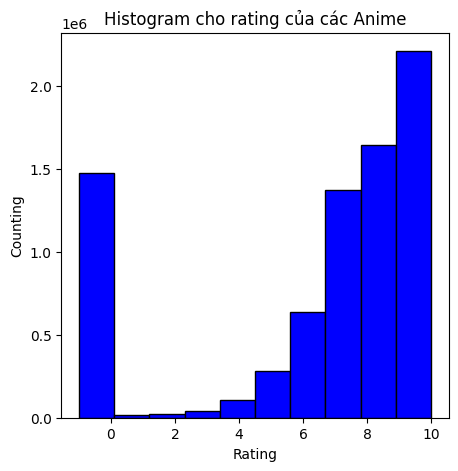

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.hist(rating['rating'], bins=10, color="blue", alpha=1.0, edgecolor="black")
axs.set_title("Histogram cho rating của các Anime")
axs.set_xlabel("Rating")
axs.set_ylabel("Counting")



- Histogram cho thấy đa số người dùng chỉ xem chứ ít khi đánh giá.
- Những phim được người dùng đánh giá ghi nhận mức điểm lệch phải trên biểu đồ tần suất

In [7]:
import numpy as np

# Xử lý loại bỏ những người dùng không đánh giá
just_rating = rating[rating["rating"] >= 0.0]

user_group = just_rating.groupby("user_id")["rating"]
user_stats = pd.DataFrame({
    "n_interactions": user_group.size(),
    "mean_rating": user_group.mean(),
    "std_rating": user_group.std(ddof=0)  # population std to avoid NaN for n=1 -> becomes 0
}).reset_index().sort_values("n_interactions", ascending=False)

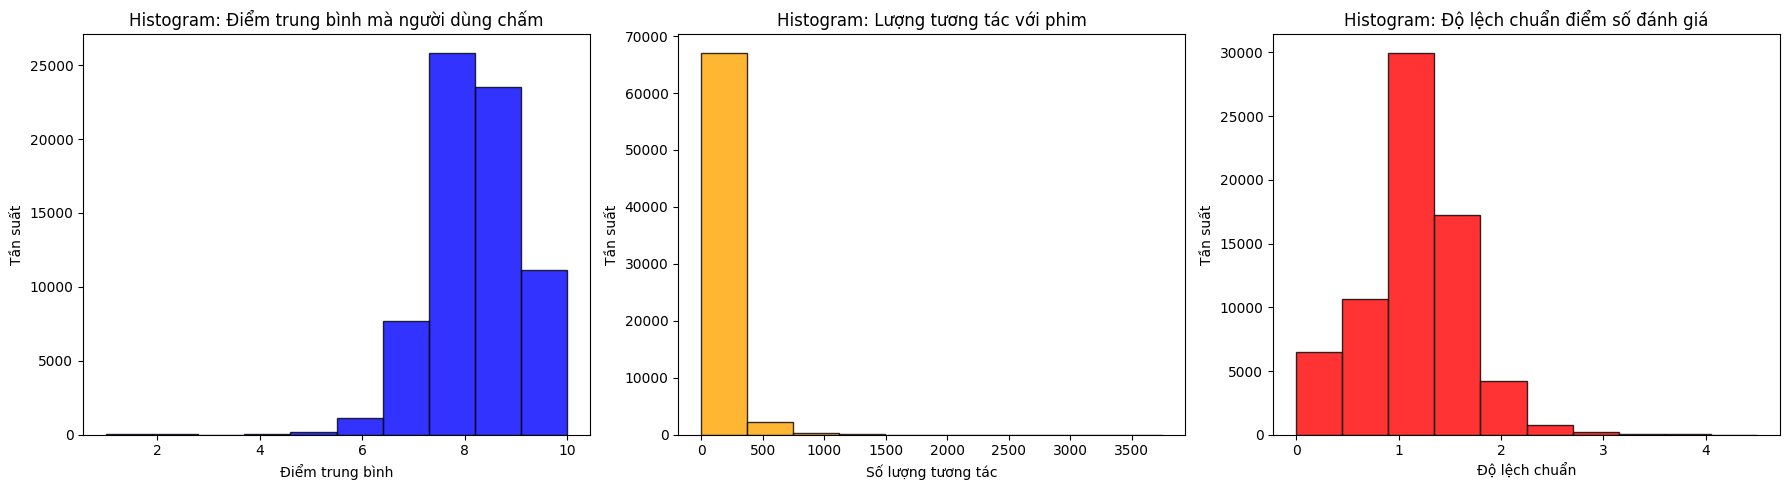

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5)) 

# Histogram cho điểm trung bình
axs[0].hist(user_stats['mean_rating'], bins=10, color="blue", alpha=0.8, edgecolor="black")
axs[0].set_title("Histogram: Điểm trung bình mà người dùng chấm")
axs[0].set_xlabel("Điểm trung bình")
axs[0].set_ylabel("Tần suất")

# Histogram cho lượng tương tác
axs[1].hist(user_stats['n_interactions'], bins=10, color="orange", alpha=0.8, edgecolor="black")
axs[1].set_title("Histogram: Lượng tương tác với phim")
axs[1].set_xlabel("Số lượng tương tác")
axs[1].set_ylabel("Tần suất")

# Histogram cho độ lệch chuẩn điểm số
axs[2].hist(user_stats['std_rating'], bins=10, color="red", alpha=0.8, edgecolor="black")
axs[2].set_title("Histogram: Độ lệch chuẩn điểm số đánh giá")
axs[2].set_xlabel("Độ lệch chuẩn")
axs[2].set_ylabel("Tần suất")

plt.tight_layout()
plt.show()


- Dựa vào số điểm trung bình mà một người dùng chấm cho các phim, cũng cho thấy được kết quả tương tự khi phân tích tần suất điểm của các đánh giá được ghi nhận trước đó. Đa số là đã xem và không chấm điểm hoặc chấm điểm rất cao chứ hiếm người dùng chấm điểm thấp. Vì vậy, số lượng lượt xem của 1 anime chưa chắc đã đánh giá được độ hay của anime đó.
- Lượng xem của người dùng thì đa số là dưới 114 (75%) lượng tương tác, cho thấy các người dùng có tương tác nhiều không mang lại quá nhiều giá trị thống kê, có thể là các đánh giá ảo.
- Biểu đồ tần suất độ lệch chuẩn điểm đánh giá cùng có xu hướng lệch trái, có điểm __mode__ là ở giữa 1 và 2, cho thấy người dùng thường không có sự thay đổi số điểm chấm qua các phim, chứng tỏ họ có sự ổn định trong sở thích xem phim.

In [9]:
user_stats.describe().drop(columns=['user_id'])

,n_interactions,mean_rating,std_rating
count,69600.000000,69600.000000,69600.000000
mean,91.052313,8.227761,1.141019
std,135.764253,0.902856,0.520530
min,1.000000,1.000000,0.000000
25%,13.000000,7.666667,0.904364
50%,45.000000,8.193548,1.168366
75%,114.000000,8.815789,1.439895
max,3747.000000,10.000000,4.500000


- Tiếp theo, ta đánh giá độ phổ biến, mức điểm đánh giá theo từng phim

In [10]:
pop = rating.groupby("anime_id")['rating'].size().rename('Popularity')
mean_rating_by_anime = just_rating.groupby('anime_id')['rating'].mean().rename('Mean_rating')
item_stats = pd.concat([pop, mean_rating_by_anime], axis=1)


df = pd.merge(item_stats, anime, on='anime_id', how='inner')

In [11]:
df.head(5)

,anime_id,Popularity,Mean_rating,name,genre,type,episodes,rating,members,n_genres,genre_primary
0,1,15509,8.869433,Cowboy Bebop,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",TV,26,8.82,486824,6,action
1,5,6927,8.439724,Cowboy Bebop: Tengoku no Tobira,"Action,Drama,Mystery,Sci-Fi,Space",Movie,1,8.40,137636,5,action
2,6,11077,8.419393,Trigun,"Action,Comedy,Sci-Fi",TV,26,8.32,283069,3,action
3,7,2629,7.533426,Witch Hunter Robin,"Action,Drama,Magic,Mystery,Police,Supernatural",TV,26,7.36,64905,6,action
4,8,413,7.198052,Beet the Vandel Buster,"Adventure,Fantasy,Shounen,Supernatural",TV,52,7.06,9848,4,adventure


- thêm độ phổ biến và điểm rating trung bình cho các phim (dựa trên điểm của các __user đã chấm điểm__)
- Sắp xếp theo thứ tự giảm dần

In [12]:
matrix_gerne = pd.read_csv("Dataset/matrix_genre.csv")
matrix_gerne.shape

(12017, 44)

In [13]:
eval_gerne = pd.merge(item_stats, matrix_gerne, on='anime_id', how='right') # Không để mất dữ liệu về phim bên phải
eval_gerne.shape

(12017, 46)

In [14]:
eval_gerne['Popularity'] = eval_gerne['Popularity'].fillna(0)

In [15]:
eval_gerne.isna().sum()

anime_id            0
Popularity          0
Mean_rating      2125
action              0
adventure           0
cars                0
comedy              0
dementia            0
demons              0
drama               0
ecchi               0
fantasy             0
game                0
harem               0
hentai              0
historical          0
horror              0
josei               0
kids                0
magic               0
martial_arts        0
mecha               0
military            0
music               0
mystery             0
parody              0
police              0
psychological       0
romance             0
samurai             0
school              0
sci-fi              0
seinen              0
shoujo              0
shoujo_ai           0
shounen             0
shounen_ai          0
slice_of_life       0
space               0
sports              0
super_power         0
supernatural        0
thriller            0
vampire             0
yaoi                0
yuri      

- Do có một số phim không được xem đến bởi những người dùng được ghi nhận trong bảng rating, hoặc thậm chí những phim có người xem nhưng không được chấm điểm, sẽ được reset 2 thông số này về 0 thay vì NaN

In [16]:
mean_rating = eval_gerne[eval_gerne['Mean_rating'] >= 0.0]
mean_rating

,anime_id,Popularity,Mean_rating,action,adventure,cars,comedy,dementia,demons,drama,...,shounen_ai,slice_of_life,space,sports,super_power,supernatural,thriller,vampire,yaoi,yuri
0,32281,2199.0,9.426313,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5114,24574.0,9.322741,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,1386.0,9.449495,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,19283.0,9.261326,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,3673.0,9.272552,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,5541,5.0,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12012,9316,4.0,4.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12013,5543,4.0,2.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12014,5621,3.0,6.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
genre_list = eval_gerne.drop(columns=['anime_id', 'Popularity', 'Mean_rating']).columns
pop_gerne = {gerne: sum(x*y for x, y in zip(eval_gerne['Popularity'], eval_gerne[gerne])) for gerne in genre_list}

rating_gerne = {genre: sum(x*y for x,y in zip(mean_rating['Mean_rating'], mean_rating[genre])) / sum(mean_rating[genre]) for genre in genre_list}
    

In [18]:
pop_gerne = dict(sorted(pop_gerne.items(), key=lambda x: x[1], reverse=True))
rating_gerne = dict(sorted(rating_gerne.items(), key=lambda x: x[1], reverse=True))

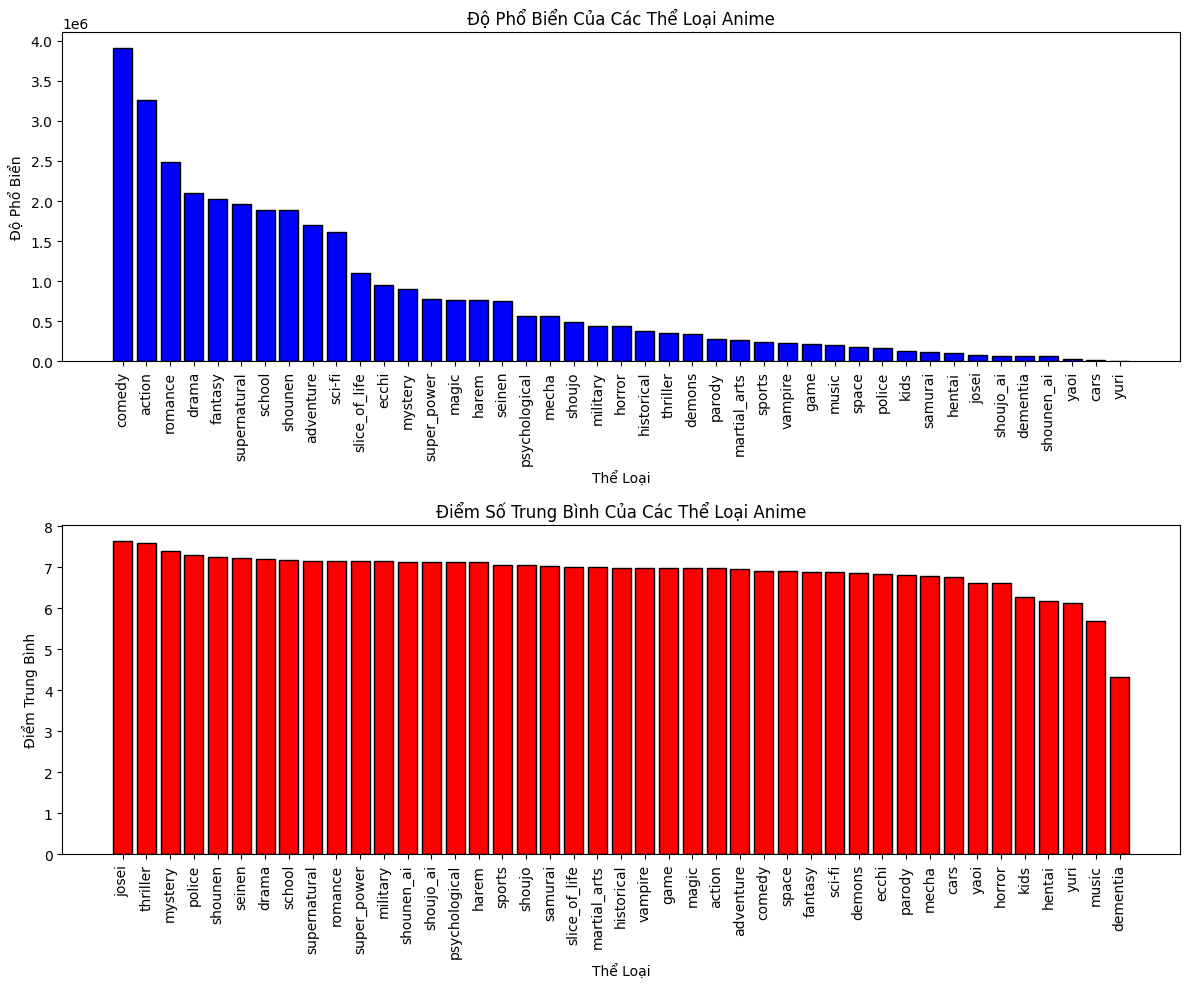

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))
axs[0].bar(list(pop_gerne.keys()), list(pop_gerne.values()), color="blue", alpha=1.0, edgecolor="black")
axs[0].set_title("Độ Phổ Biển Của Các Thể Loại Anime")
axs[0].set_xlabel("Thể Loại")
axs[0].set_ylabel("Độ Phổ Biển")
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(list(rating_gerne.keys()), list(rating_gerne.values()), color="red", alpha=1.0, edgecolor="black")
axs[1].set_title("Điểm Số Trung Bình Của Các Thể Loại Anime")
axs[1].set_xlabel("Thể Loại")
axs[1].set_ylabel("Điểm Trung Bình")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

- 5 thể loại anime phổ biến nhất: comedy, action, romance, drama và fantasy
- Trong khi đối với __những phim được chấm điểm__ lại chứng kiến việc điểm số ngang ngang nhau và điểm số trung bình đa số là trên 6. Hơn nữa các thể loại nằm trong top 5 phổ biến cũng không nằm trong top 5 điểm số

- Vẽ boxplot thể hiện độ phổ biến và độ được yêu thích của người xem qua các __type__ (TV, Movie, OVA,..)

- Đã chạy lại (2)